<a href="https://colab.research.google.com/github/someDeveloperDH/game/blob/Vlolet/RSP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024-1학기 딥러닝 - 기말 팀 프로젝트
## **가위 바위 보 분류하기(RPS Classification)**
   

T1 (박동혁, 이유준, 배도현)

###1. 1차 모델

#### 1-1. 학습 준비

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from random import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Data 경로 설정

In [ ]:
# 필요시 경로 수정 필수
base_dir = "/content/drive/MyDrive/Colab Notebooks/myRPS/RPS"

train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")

train_paper_dir = os.path.join(train_dir,"paper") # 각 650개
train_rock_dir = os.path.join(train_dir,"rock")
train_scissors_dir = os.path.join(train_dir,"scissors")

test_paper_dir = os.path.join(test_dir,"paper") # 각 90개
test_rock_dir = os.path.join(test_dir,"rock")
test_scissors_dir = os.path.join(test_dir,"scissors")

#### 1-2. Data 전처리

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

print(train_datagen)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',  # subset 미설정 시 분리되지 않음
                                                    batch_size=16,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=(224,224))
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         subset='validation',
                                                              batch_size=4,
                                                              color_mode='rgb',
                                                              class_mode='categorical',
                                                              target_size=(224,224))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=(224,224))
print(f"훈련 이미지 개수: {train_generator.samples}")
print(f"검증 이미지 개수: {validation_generator.samples}")
print(f"테스트 이미지 개수: {test_generator.samples}")

Found 1365 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
훈련 이미지 개수: 1365
검증 이미지 개수: 585
테스트 이미지 개수: 270


In [ ]:
# 폴더기준으로 자동으로 클래스 나눈거 확인
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

#### 1-3. 모델 생성

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])


#### 1-4. 모델 학습

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_steps=10,
                              verbose=2)

<ipython-input-9-1e5eb6015191>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
10/10 - 61s - loss: 1.3715 - accuracy: 0.3063 - val_loss: 1.0999 - val_accuracy: 0.3250 - 61s/epoch - 6s/step
Epoch 2/100
10/10 - 60s - loss: 1.0984 - accuracy: 0.3750 - val_loss: 1.0945 - val_accuracy: 0.4000 - 60s/epoch - 6s/step
Epoch 3/100
10/10 - 38s - loss: 1.1001 - accuracy: 0.3063 - val_loss: 1.0948 - val_accuracy: 0.3750 - 38s/epoch - 4s/step
Epoch 4/100
10/10 - 36s - loss: 1.0984 - accuracy: 0.3688 - val_loss: 1.0991 - val_accuracy: 0.2750 - 36s/epoch - 4s/step
Epoch 5/100
10/10 - 39s - loss: 1.1050 - accuracy: 0.2875 - val_loss: 1.0893 - val_accuracy: 0.3750 - 39s/epoch - 4s/step
Epoch 6/100
10/10 - 31s - loss: 1.0983 - accuracy: 0.3187 - val_loss: 1.1025 - val_accuracy: 0.2750 - 31s/epoch - 3s/step
Epoch 7/100
10/10 - 28s - loss: 1.0976 - accuracy: 0.3562 - val_loss: 1.1166 - val_accuracy: 0.3000 - 28s/epoch - 3s/step
Epoch 8/100
10/10 - 21s - loss: 1.0988 - accuracy: 0.3688 - val_loss: 1.1073 - val_accuracy: 0.2500 - 21s/epoch - 2s/step
Epoch 9/100
10/10 - 21s 

#### 1-5. 모델 평가 및 학습 과정 시각화

In [ ]:
model.evaluate(train_generator)

86/86 [==============================] - 8s 95ms/step - loss: 0.2293 - accuracy: 0.9267


[0.22931018471717834, 0.9267399311065674]

In [ ]:
model.evaluate(validation_generator)

147/147 [==============================] - 4s 28ms/step - loss: 2.6963 - accuracy: 0.5880


[2.696296215057373, 0.5880342125892639]

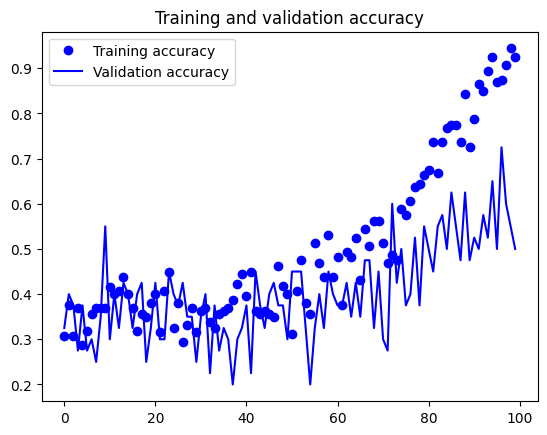

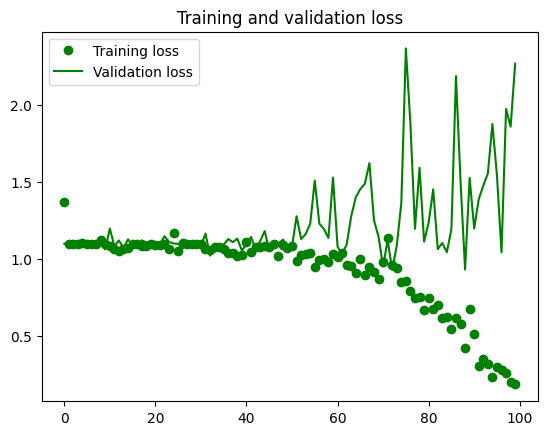

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

20/20 [==============================] - 31s 2s/step - loss: 1.0619 - accuracy: 0.7375
Test accuracy: 0.737500011920929
Test loss: 1.0618866682052612


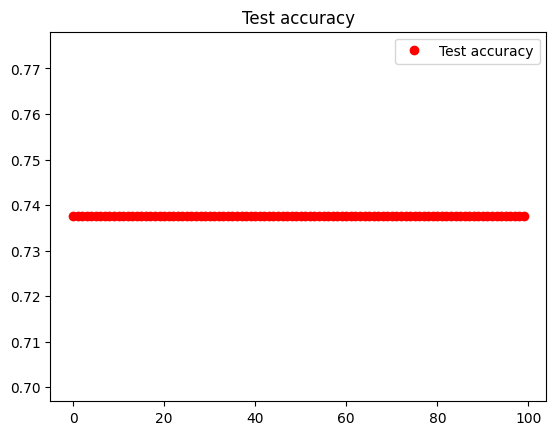

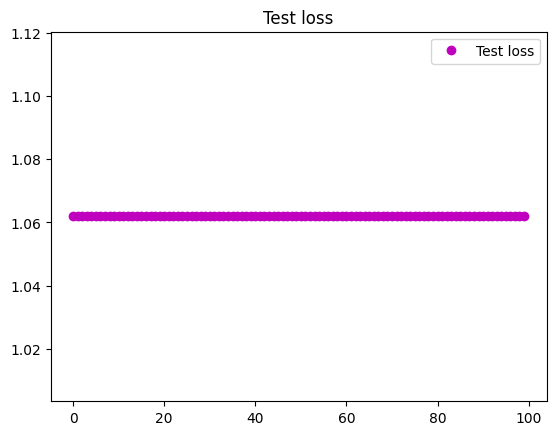

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=20)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

plt.figure()

plt.plot(epochs, [test_acc]*len(epochs), 'ro', label='Test accuracy')
plt.title('Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, [test_loss]*len(epochs), 'mo', label='Test loss')
plt.title('Test loss')
plt.legend()

plt.show()

### 2. 1차 모델의 문제점 및 개선 방안

#### 2.1 모델의 문제점

- Training & Validation Accuracy 그래프에서,   
Training accracy는 높으나 Validation accuracy는 낮은 경향을 보임   
   
- Training & Validation Loss 그래프에서,   
Training loss는 낮으나 Validation loss는 높은 경향을 보임   

    
**따라서**   
모델이 Training Data에 과적합 되었음을 알 수 있다.

결국 Test Accuracy 그래프와 Test Loss 그래프에서 볼 수 있듯,    
모델 성능이 매우 좋지 않았다.

#### 2.2 개선 방안

일반적으로 과적합 상황에서 CNN 모델을 개선할 수 있는 방안은 다음과 같다.
1. 학습 데이터 양 증대 및 전처리 개선
2. 모델의 복잡도 조정 혹은 전이 학습
3. 정규화 기법 사용(드롭아웃, 배치 정규화 등)
4. 하이퍼파라미터 조정
5. Loss Function과 Optimizer 변경
6. 앙상블

### 3. 개선과정(1) - 데이터 증강 및 전이 학습

전이 학습을 위한 모델로 Inception V4와 ResNet을 Ensemble 한 모델을 시도하였다.

#### 3-1. 학습 준비
1차 모델을 위에서 이미 실행했다면 실행할 필요 없음

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from random import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Data 경로 설정

In [ ]:
# 필요시 경로 수정 필수
base_dir = "/content/drive/MyDrive/Colab Notebooks/myRPS/RPS"

train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")

train_paper_dir = os.path.join(train_dir,"paper") # 각 650개
train_rock_dir = os.path.join(train_dir,"rock")
train_scissors_dir = os.path.join(train_dir,"scissors")

test_paper_dir = os.path.join(test_dir,"paper") # 각 90개
test_rock_dir = os.path.join(test_dir,"rock")
test_scissors_dir = os.path.join(test_dir,"scissors")

print(f"훈련 이미지 개수 (paper): {len(os.listdir(train_paper_dir))}")
print(f"훈련 이미지 개수 (rock): {len(os.listdir(train_rock_dir))}")
print(f"훈련 이미지 개수 (scissors): {len(os.listdir(train_scissors_dir))}")

print(f"테스트 이미지 개수 (paper): {len(os.listdir(test_paper_dir))}")
print(f"테스트 이미지 개수 (rock): {len(os.listdir(test_rock_dir))}")
print(f"테스트 이미지 개수 (scissors): {len(os.listdir(test_scissors_dir))}")

훈련 이미지 개수 (paper): 650
훈련 이미지 개수 (rock): 650
훈련 이미지 개수 (scissors): 650
테스트 이미지 개수 (paper): 90
테스트 이미지 개수 (rock): 90
테스트 이미지 개수 (scissors): 90


#### 3-2. Data 전처리

In [ ]:
# Data Augmentation 적용
train_datagen = ImageDataGenerator(
    rotation_range=90,
    # brightness_range=(1, 1),
    shear_range=0.2,
    zoom_range=0.1,
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,

    rescale = 1./255, validation_split=0.3)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 32
test_batch_size = batch_size * 2
target_size = (224, 224) # input image size

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',  # subset 미설정 시 분리되지 않음
                                                    batch_size=batch_size,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=target_size)

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         subset='validation',
                                                              batch_size=batch_size,
                                                              color_mode='rgb',
                                                              class_mode='categorical',
                                                              target_size=target_size)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=test_batch_size,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=target_size)

print(f"훈련 이미지 개수: {train_generator.samples}")
print(f"검증 이미지 개수: {validation_generator.samples}")
print(f"테스트 이미지 개수: {test_generator.samples}")

Found 1365 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
훈련 이미지 개수: 1365
검증 이미지 개수: 585
테스트 이미지 개수: 270


In [ ]:
# 폴더기준으로 자동으로 클래스 나눈거 확인
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

#### 3-3. 모델 생성

Base Model로 InceptionV3를 이용하고, 가져온 모델은 학습시키지 않게 한다.

In [ ]:
base_model_InceptionV3 = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model_InceptionV3.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    base_model_InceptionV3,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_steps=10,
    verbose=2)

Epoch 1/100
10/10 - 167s - loss: 3.4807 - accuracy: 0.4187 - val_loss: 0.7969 - val_accuracy: 0.6469 - 167s/epoch - 17s/step
Epoch 2/100
10/10 - 95s - loss: 0.8355 - accuracy: 0.6438 - val_loss: 0.7434 - val_accuracy: 0.6781 - 95s/epoch - 10s/step
Epoch 3/100
10/10 - 59s - loss: 0.5947 - accuracy: 0.7812 - val_loss: 0.5645 - val_accuracy: 0.8062 - 59s/epoch - 6s/step
Epoch 4/100
10/10 - 43s - loss: 0.4598 - accuracy: 0.8313 - val_loss: 0.5043 - val_accuracy: 0.8094 - 43s/epoch - 4s/step
Epoch 5/100
10/10 - 30s - loss: 0.4372 - accuracy: 0.8531 - val_loss: 0.4436 - val_accuracy: 0.8625 - 30s/epoch - 3s/step
Epoch 6/100
10/10 - 26s - loss: 0.3561 - accuracy: 0.8813 - val_loss: 0.4089 - val_accuracy: 0.8656 - 26s/epoch - 3s/step
Epoch 7/100
10/10 - 22s - loss: 0.3238 - accuracy: 0.8781 - val_loss: 0.3914 - val_accuracy: 0.8500 - 22s/epoch - 2s/step
Epoch 8/100
10/10 - 22s - loss: 0.3200 - accuracy: 0.8938 - val_loss: 0.3321 - val_accuracy: 0.8938 - 22s/epoch - 2s/step
Epoch 9/100
10/10 - 

In [ ]:
model.evaluate(train_generator)

43/43 [==============================] - 23s 527ms/step - loss: 0.1040 - accuracy: 0.9575


[0.10402277857065201, 0.9575091600418091]

In [ ]:
model.evaluate(validation_generator)

19/19 [==============================] - 12s 627ms/step - loss: 0.2401 - accuracy: 0.9179


[0.24012596905231476, 0.9179487228393555]

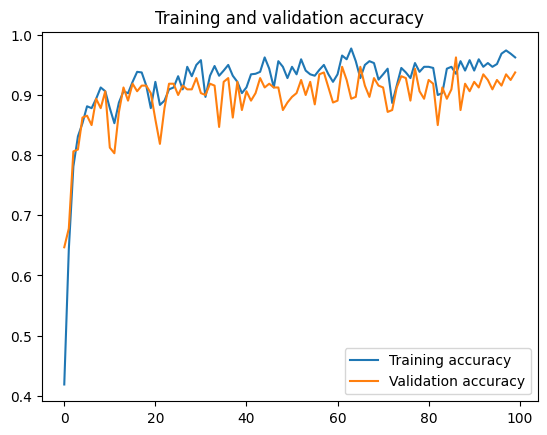

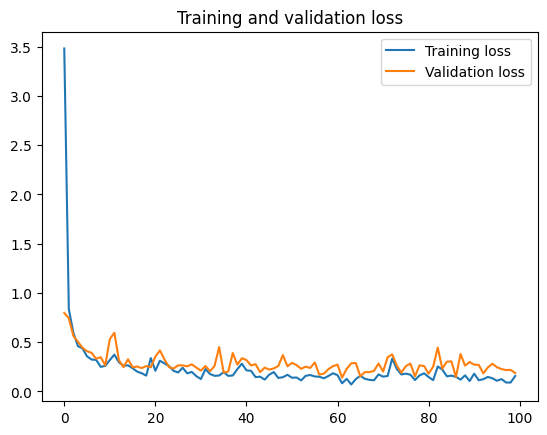

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

충분히 유의미한 결과를 도출했다고 판단하여 하이퍼파라미터 조정을 시도하였다.

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
if os.path.islink(my_path):
  os.unlink(my_path)
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --target=$my_path optuna

  Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
  Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Using cached SQLAlchemy-2.0.30-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Using cached Mako-1.3.5-py3-none-any.whl (78 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached greenlet-3.0.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (616 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [ ]:
import optuna

In [ ]:
base_model_InceptionV3 = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model_InceptionV3.trainable = False

def create_model(trial):
    # 하이퍼파라미터 정의
    n_layers = trial.suggest_int('n_layers', 1, 4)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    # 모델 생성
    model = tf.keras.models.Sequential()
    model.add(base_model_InceptionV3)
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())

    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 32, 128)
        model.add(tf.keras.layers.Dense(num_hidden, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    # 모델 컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def objective(trial):
    # 모델 생성
    model = create_model(trial)

    # 모델 학습
    model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        batch_size=32,
        verbose=0
    )

    # 검증 손실 반환
    score = model.evaluate(validation_generator)
    return score[0]

# Study 생성 및 최적화 수행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-15 19:55:58,779] A new study created in memory with name: no-name-6f25affd-1c8c-42c6-a2ee-7cc2c3c7a115
<ipython-input-15-63895f5f2d6b>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
<ipython-input-15-63895f5f2d6b>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[W 2024-06-15 19:56:16,521] Trial 0 failed with parameters: {'n_layers': 4, 'dropout_rate': 0.26097282010128825, 'learning_rate': 0.01721624005794731, 'n_units_l0': 103, 'n_units_l1': 95, 'n_units_l2': 84, 'n_units_l3': 53} because of the following error: InvalidArgumentError().
Trace

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-63895f5f2d6b>", line 55, in <cell line: 55>

  File "/content/notebooks/optuna/study/study.py", line 451, in optimize

  File "/content/notebooks/optuna/study/_optimize.py", line 62, in _optimize

  File "/content/notebooks/optuna/study/_optimize.py", line 159, in _optimize_sequential

  File "/content/notebooks/optuna/study/_optimize.py", line 196, in _run_trial

  File "<ipython-input-15-63895f5f2d6b>", line 41, in objective

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,3] and labels shape [96]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_57201]